### Importación de datos



In [2]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


In [5]:
tienda['Tienda'] = 'Tienda 1'
tienda2['Tienda'] = 'Tienda 2'
tienda3['Tienda'] = 'Tienda 3'
tienda4['Tienda'] = 'Tienda 4'

df_completo = pd.concat([tienda, tienda2, tienda3, tienda4], ignore_index=True)

print(df_completo.head())

            Producto Categoría del Producto    Precio  Costo de envío  \
0  Asistente virtual           Electrónicos  164300.0          6900.0   
1    Mesa de comedor                Muebles  192300.0          8400.0   
2      Juego de mesa               Juguetes  209600.0         15900.0   
3         Microondas      Electrodomésticos  757500.0         41000.0   
4   Silla de oficina                Muebles  335200.0         20200.0   

  Fecha de Compra         Vendedor Lugar de Compra  Calificación  \
0      16/01/2021      Pedro Gomez          Bogotá             4   
1      18/05/2022  Beatriz Morales        Medellín             1   
2      15/03/2021   Juan Fernandez       Cartagena             1   
3      03/05/2022   Juan Fernandez            Cali             4   
4      07/11/2020    Maria Alfonso        Medellín             5   

       Método de pago  Cantidad de cuotas       lat       lon    Tienda  
0  Tarjeta de crédito                   8   4.60971 -74.08175  Tienda 1  
1  T

#1. Análisis de facturación



Facturación Total por Tienda:
Tienda
Tienda 1    $1,150,880,400.00
Tienda 2    $1,116,343,500.00
Tienda 3    $1,098,019,600.00
Tienda 4    $1,038,375,700.00
Name: Precio, dtype: object


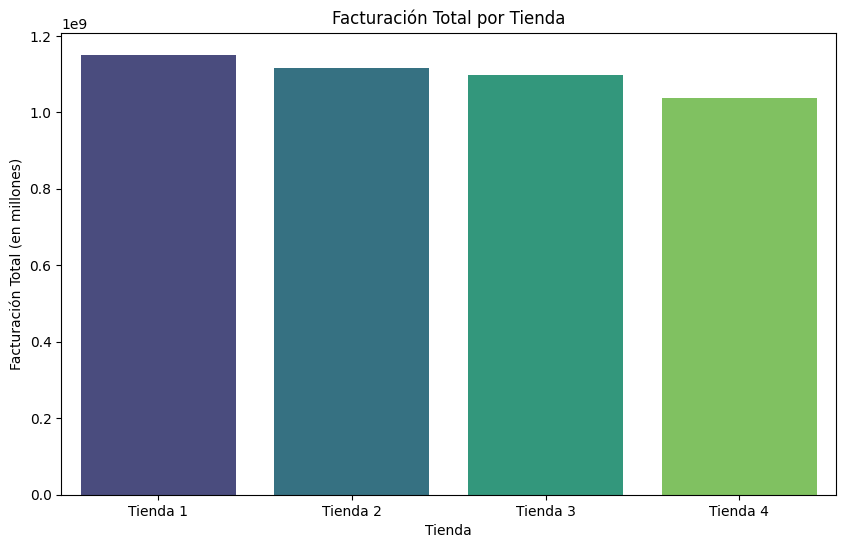

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

facturacion_por_tienda = df_completo.groupby('Tienda')['Precio'].sum().sort_values(ascending=False)

print("Facturación Total por Tienda:")
print(facturacion_por_tienda.apply(lambda x: f'${x:,.2f}'))

plt.figure(figsize=(10, 6))
sns.barplot(x=facturacion_por_tienda.index, y=facturacion_por_tienda.values, palette='viridis', hue=facturacion_por_tienda.index, legend=False)
plt.title('Facturación Total por Tienda')
plt.xlabel('Tienda')
plt.ylabel('Facturación Total (en millones)')
plt.show()

# 2. Ventas por categoría

Categoría más popular por Tienda:
      Tienda Categoría del Producto  Numero de Ventas
7   Tienda 1                Muebles               465
15  Tienda 2                Muebles               442
23  Tienda 3                Muebles               499
31  Tienda 4                Muebles               480


/tmp/ipython-input-7-1321028066.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  g = sns.catplot(data=ventas_categoria, x='Categoría del Producto', y='Numero de Ventas', col='Tienda', kind='bar', col_wrap=2, palette='plasma', height=5, aspect=1.2)


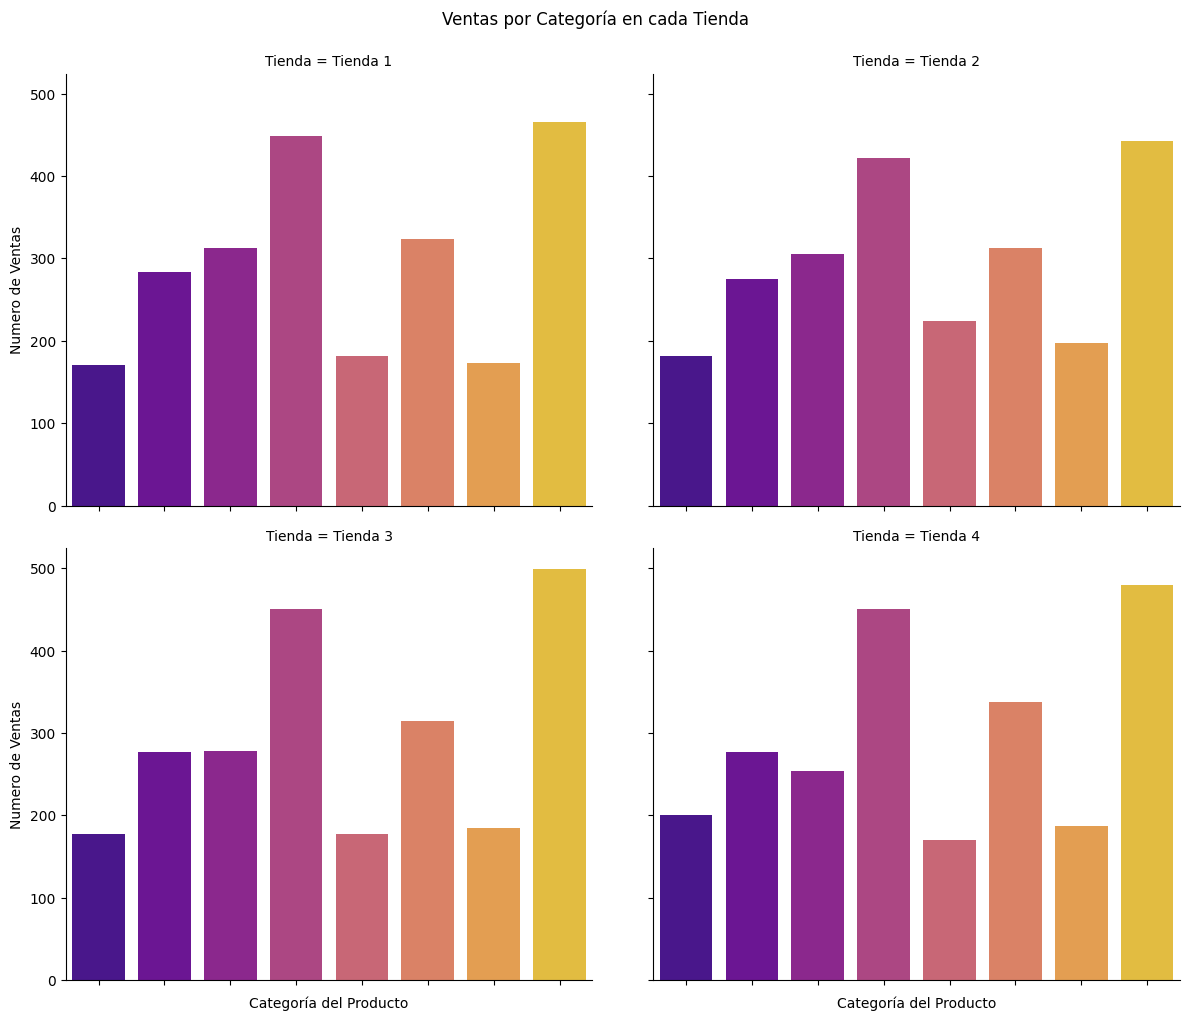

In [7]:
ventas_categoria = df_completo.groupby(['Tienda', 'Categoría del Producto']).size().reset_index(name='Numero de Ventas')

categoria_mas_vendida = ventas_categoria.loc[ventas_categoria.groupby('Tienda')['Numero de Ventas'].idxmax()]

print("Categoría más popular por Tienda:")
print(categoria_mas_vendida)

g = sns.catplot(data=ventas_categoria, x='Categoría del Producto', y='Numero de Ventas', col='Tienda', kind='bar', col_wrap=2, palette='plasma', height=5, aspect=1.2)
g.set_xticklabels(rotation=45)
g.fig.suptitle('Ventas por Categoría en cada Tienda', y=1.03)
plt.show()

# 3. Calificación promedio de la tienda


Calificación Promedio por Tienda:
Tienda
Tienda 3    4.05
Tienda 2    4.04
Tienda 4    4.00
Tienda 1    3.98
Name: Calificación, dtype: float64


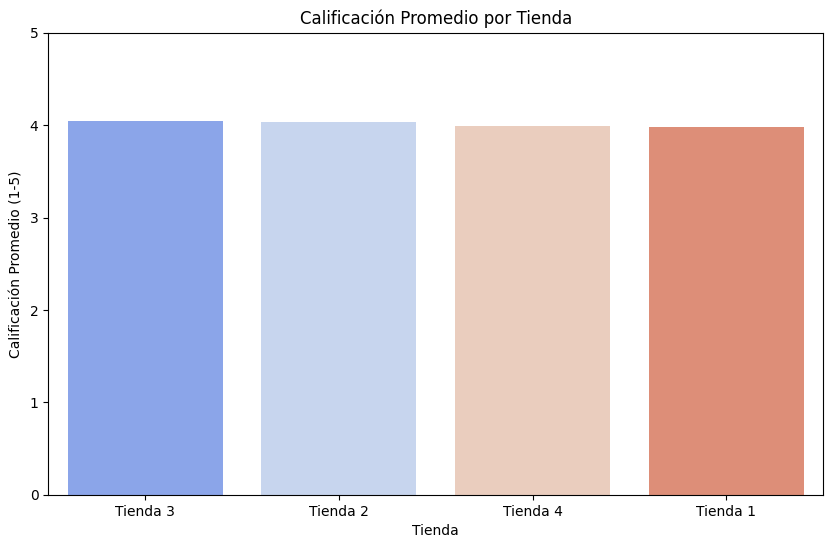

In [12]:
calificacion_promedio = df_completo.groupby('Tienda')['Calificación'].mean().sort_values(ascending=False)

print("Calificación Promedio por Tienda:")
print(calificacion_promedio.round(2))

plt.figure(figsize=(10, 6))
sns.barplot(x=calificacion_promedio.index, y=calificacion_promedio.values, palette='coolwarm', hue=calificacion_promedio.index, legend=False)
plt.title('Calificación Promedio por Tienda')
plt.xlabel('Tienda')
plt.ylabel('Calificación Promedio (1-5)')
plt.ylim(0, 5)
plt.show()

# 4. Productos más y menos vendidos

In [9]:
conteo_productos = df_completo.groupby(['Tienda', 'Producto']).size().reset_index(name='Unidades Vendidas')

idx_mas_vendidos = conteo_productos.groupby('Tienda')['Unidades Vendidas'].idxmax()
mas_vendidos = conteo_productos.loc[idx_mas_vendidos]

idx_menos_vendidos = conteo_productos.groupby('Tienda')['Unidades Vendidas'].idxmin()
menos_vendidos = conteo_productos.loc[idx_menos_vendidos]

print("--- Productos Más Vendidos por Tienda ---")
print(mas_vendidos)
print("\n" + "="*40 + "\n")
print("--- Productos Menos Vendidos por Tienda ---")
print(menos_vendidos)

--- Productos Más Vendidos por Tienda ---
       Tienda                   Producto  Unidades Vendidas
1    Tienda 1                    Armario                 60
75   Tienda 2  Iniciando en programación                 65
129  Tienda 3              Kit de bancas                 57
163  Tienda 4                   Cama box                 62


--- Productos Menos Vendidos por Tienda ---
       Tienda                   Producto  Unidades Vendidas
4    Tienda 1  Auriculares con micrófono                 33
77   Tienda 2              Juego de mesa                 32
111  Tienda 3    Bloques de construcción                 35
175  Tienda 4         Guitarra eléctrica                 33


# 5. Envío promedio por tienda

Costo de Envío Promedio por Tienda:
Tienda
Tienda 4    $23,459.46
Tienda 3    $24,805.68
Tienda 2    $25,216.24
Tienda 1    $26,018.61
Name: Costo de envío, dtype: object


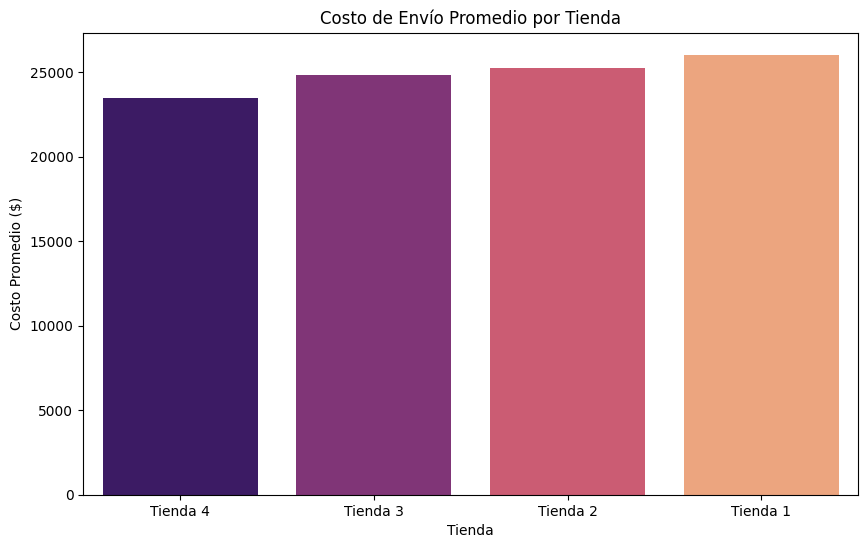

In [13]:
envio_promedio = df_completo.groupby('Tienda')['Costo de envío'].mean().sort_values()

print("Costo de Envío Promedio por Tienda:")
print(envio_promedio.apply(lambda x: f'${x:,.2f}'))

plt.figure(figsize=(10, 6))
sns.barplot(x=envio_promedio.index, y=envio_promedio.values, palette='magma', hue=envio_promedio.index, legend=False)
plt.title('Costo de Envío Promedio por Tienda')
plt.xlabel('Tienda')
plt.ylabel('Costo Promedio ($)')
plt.show()